In [ ]:
# colab 환경에서 진행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

path = '/content/drive/MyDrive/TermProject/'


Audience1 = pd.read_excel(path + 'Audience.xlsx', header = 2,)
ranking1 = pd.read_excel(path + 'ranking1.xlsx')
Audience2 = pd.read_excel(path + 'Audience2.xlsx', header = 2,)
ranking2 = pd.read_excel(path + 'ranking2.xlsx')

In [ ]:
tem1 = pd.merge(Audience1, ranking1, how = 'left')
tem1.head()

,단체,리그,시즌,연도,월,일,요일,홈팀,원정팀,경기장,날씨,평균기온,관중수,홈팀순위,원정팀순위
0,KBO,정규리그,2019 시즌,2019,10,1,화,두산,NC,서울 잠실 야구장,구름많음,28.2℃,24081,1.0,5
1,KBO,정규리그,2019 시즌,2019,10,1,화,롯데,키움히어로즈,부산 사직 야구장,비,23.3℃,1842,10.0,3
2,KBO,정규리그,2019 시즌,2019,9,30,월,한화,SK,대전한밭종합운동장,맑음,29.1℃,10960,9.0,1
3,KBO,정규리그,2019 시즌,2019,9,30,월,LG,롯데,서울 잠실 야구장,맑음,29.9℃,12042,4.0,10
4,KBO,정규리그,2019 시즌,2019,9,29,일,롯데,키움히어로즈,부산 사직 야구장,구름조금,28.8℃,3331,10.0,3


In [ ]:
Audience2['홈팀'][Audience2['홈팀'] == ' SSG'] = 'SSG'
Audience2['원정팀'][Audience2['원정팀'] == ' SSG'] = 'SSG'
tem2 = pd.merge(Audience2, ranking2, how = 'left')
tem2.rename(columns = {'순위' : '홈팀순위'}, inplace = True)
tem2 = pd.merge(tem2, ranking2.rename(columns = {'홈팀' : '원정팀'}), how = 'left')
tem2.rename(columns = {'순위' : '원정팀순위'}, inplace = True)
tem2.head()

,단체,리그,시즌,연도,월,일,요일,홈팀,원정팀,경기장,날씨,평균기온,관중수,홈팀순위,원정팀순위
0,KBO,정규리그,2022 시즌,2022,5,31,화,두산,KIA,서울 잠실 야구장,맑음,27.2℃,18194,5,3
1,KBO,정규리그,2022 시즌,2022,5,31,화,SSG,KT,인천SSG 랜더스필드,맑음,22.8℃,7883,1,8
2,KBO,정규리그,2022 시즌,2022,5,31,화,롯데,LG,부산 사직 야구장,맑음,27.4℃,7815,7,4
3,KBO,정규리그,2022 시즌,2022,5,31,화,키움히어로즈,삼성,서울고척스카이돔,맑음,27.2℃,4100,2,6
4,KBO,정규리그,2022 시즌,2022,5,31,화,한화,NC,대전한밭종합운동장,맑음,28.7℃,4269,9,10


In [ ]:
tem1.dropna(axis=0, inplace = True)
tem1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 0 to 2307
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   단체      2307 non-null   object 
 1   리그      2307 non-null   object 
 2   시즌      2307 non-null   object 
 3   연도      2307 non-null   int64  
 4   월       2307 non-null   int64  
 5   일       2307 non-null   int64  
 6   요일      2307 non-null   object 
 7   홈팀      2307 non-null   object 
 8   원정팀     2307 non-null   object 
 9   경기장     2307 non-null   object 
 10  날씨      2307 non-null   object 
 11  평균기온    2307 non-null   object 
 12  관중수     2307 non-null   int64  
 13  홈팀순위    2307 non-null   float64
 14  원정팀순위   2307 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 288.4+ KB


In [ ]:
tem2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   단체      255 non-null    object
 1   리그      255 non-null    object
 2   시즌      255 non-null    object
 3   연도      255 non-null    int64 
 4   월       255 non-null    int64 
 5   일       255 non-null    int64 
 6   요일      255 non-null    object
 7   홈팀      255 non-null    object
 8   원정팀     255 non-null    object
 9   경기장     255 non-null    object
 10  날씨      150 non-null    object
 11  평균기온    150 non-null    object
 12  관중수     255 non-null    int64 
 13  홈팀순위    255 non-null    int64 
 14  원정팀순위   255 non-null    int64 
dtypes: int64(6), object(9)
memory usage: 31.9+ KB


In [ ]:
dat = pd.concat([tem1, tem2])

dat['홈팀'][dat['홈팀'] == '넥센'] = '키움히어로즈'
dat['원정팀'][dat['원정팀'] == '넥센'] = '키움히어로즈'

dat['홈팀'][dat['홈팀'] == 'SK'] = 'SSG'
dat['원정팀'][dat['원정팀'] == 'SK'] = 'SSG'

dat['평균기온'] = (dat['평균기온'].str.extract('([\d.]+)'))
dat['평균기온'] = dat['평균기온'].astype(float)

dat.drop(['단체', '리그', '시즌', '경기장', '일'], axis = 1, inplace = True)
dat.drop(dat['관중수'][dat['관중수'] == 0].index, inplace = True)
dat.head()

,연도,월,요일,홈팀,원정팀,날씨,평균기온,관중수,홈팀순위,원정팀순위
0,2019,10,화,두산,NC,구름많음,28.2,24081,1.0,5
1,2019,10,화,롯데,키움히어로즈,비,23.3,1842,10.0,3
2,2019,9,월,한화,SSG,맑음,29.1,10960,9.0,1
3,2019,9,월,LG,롯데,맑음,29.9,12042,4.0,10
4,2019,9,일,롯데,키움히어로즈,구름조금,28.8,3331,10.0,3


In [ ]:
dat.groupby('연도')['관중수'].mean()

연도
2017    11667.622222
2018    11217.273481
2019    10122.212291
2022     8303.018182
Name: 관중수, dtype: float64

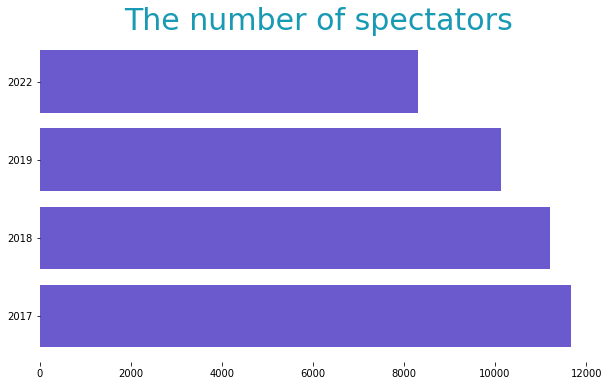

In [ ]:
plt.figure(figsize=[10,6])
plt.title('The number of spectators', color='#189AB4', fontsize=30)
plt.barh(['2017', '2018', '2019', '2022'], dat.groupby('연도')['관중수'].mean(), color='slateblue')
plt.box(False)
plt.show()

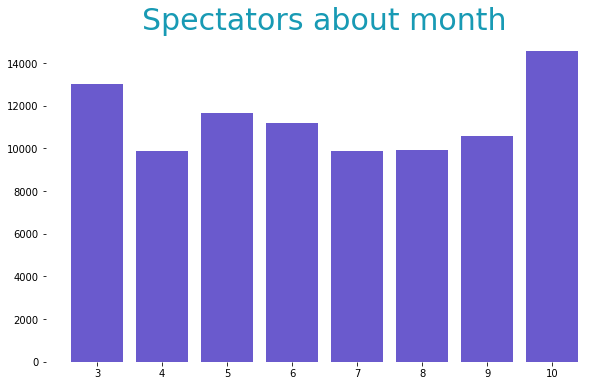

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Spectators about month', color='#189AB4', fontsize=30)
plt.bar(dat.groupby('월')['관중수'].mean().index, dat.groupby('월')['관중수'].mean(), color='slateblue')
plt.box(False)
plt.show()

In [ ]:
dat.groupby('요일')['관중수'].mean()

요일
금    10574.875332
목     8462.683673
수     8329.315657
월     9078.777778
일    12631.464467
토    15701.214976
화     8630.261307
Name: 관중수, dtype: float64

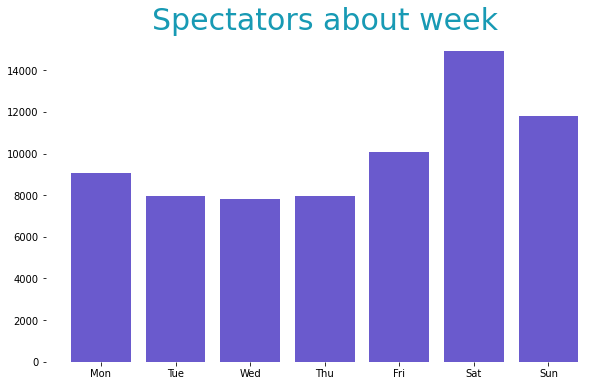

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Spectators about week', color='#189AB4', fontsize=30)
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], [9078, 7975, 7794, 7970, 10053, 14914, 11806], color='slateblue')
plt.box(False)
plt.show()

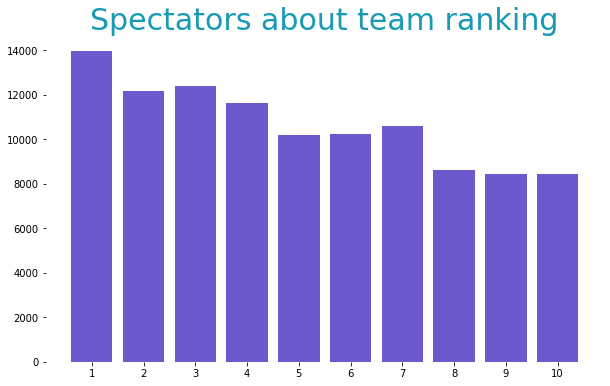

In [ ]:
plt.figure(figsize=[10,6])
plt.title('Spectators about team ranking', color='#189AB4', fontsize=30)
plt.bar(['1','2','3','4','5','6','7','8','9','10'], dat.groupby('홈팀순위')['관중수'].mean(), color='slateblue')
plt.box(False)
plt.show()

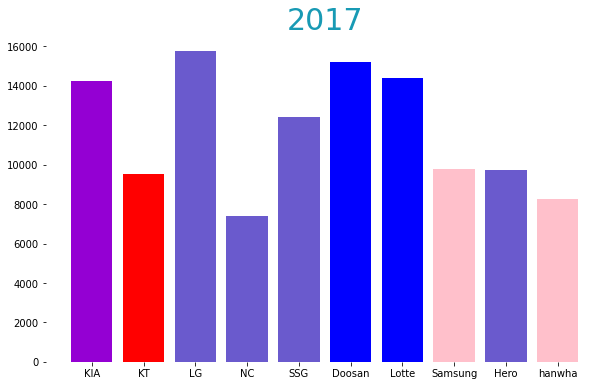

In [ ]:
plt.figure(figsize=[10,6])
team = ['KIA', 'KT', 'LG', 'NC', 'SSG', 'Doosan', 'Lotte', 'Samsung', 'Hero', 'hanwha']
plt.title('2017', color='#189AB4', fontsize=30)
colors = ['darkviolet', 'red', 'slateblue', 'slateblue', 'slateblue', 'blue', 'blue', 'pink', 'slateblue', 'pink']
plt.bar(team , dat[dat['연도'] == 2017].groupby('홈팀')['관중수'].mean(), color=colors)
plt.box(False)
plt.show()

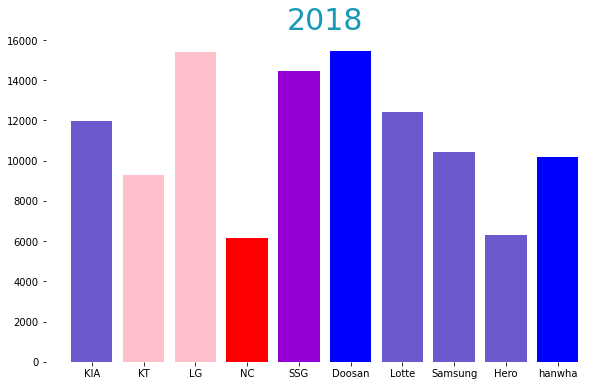

In [ ]:
plt.figure(figsize=[10,6])
team = ['KIA', 'KT', 'LG', 'NC', 'SSG', 'Doosan', 'Lotte', 'Samsung', 'Hero', 'hanwha']
plt.title('2018', color='#189AB4', fontsize=30)
colors = ['slateblue', 'pink', 'pink', 'red', 'darkviolet', 'blue', 'slateblue', 'slateblue', 'slateblue', 'blue']
plt.bar(team , dat[dat['연도'] == 2018].groupby('홈팀')['관중수'].mean(), color=colors)
plt.box(False)
plt.show()

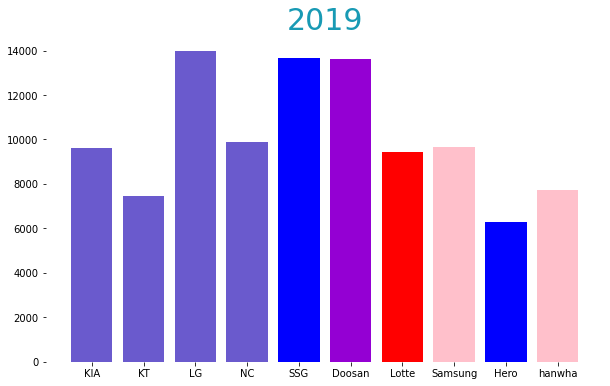

In [ ]:
plt.figure(figsize=[10,6])
team = ['KIA', 'KT', 'LG', 'NC', 'SSG', 'Doosan', 'Lotte', 'Samsung', 'Hero', 'hanwha']
plt.title('2019', color='#189AB4', fontsize=30)
colors = ['slateblue', 'slateblue', 'slateblue', 'slateblue', 'blue', 'darkviolet', 'red', 'pink', 'blue', 'pink']
plt.bar(team , dat[dat['연도'] == 2019].groupby('홈팀')['관중수'].mean(), color=colors)
plt.box(False)
plt.show()

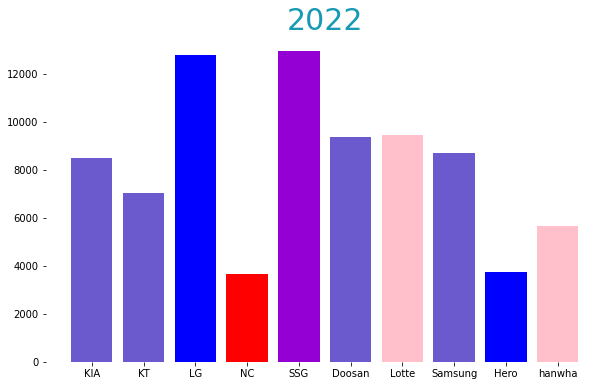

In [ ]:
plt.figure(figsize=[10,6])
team = ['KIA', 'KT', 'LG', 'NC', 'SSG', 'Doosan', 'Lotte', 'Samsung', 'Hero', 'hanwha']
plt.title('2022', color='#189AB4', fontsize=30)
colors = ['slateblue', 'slateblue', 'blue', 'red', 'darkviolet', 'slateblue', 'pink', 'slateblue', 'blue', 'pink']
plt.bar(team , dat[dat['연도'] == 2022].groupby('홈팀')['관중수'].mean(), color=colors)
plt.box(False)
plt.show()

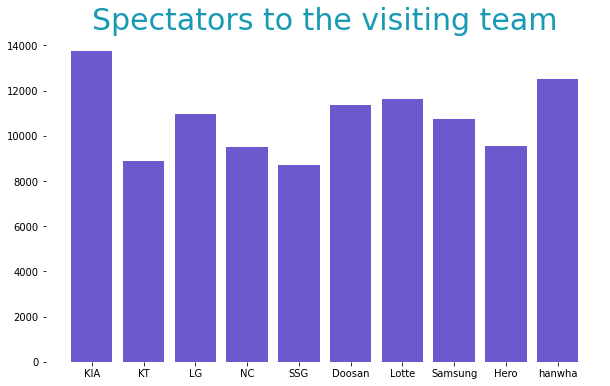

In [ ]:
plt.figure(figsize=[10,6])
team = ['KIA', 'KT', 'LG', 'NC', 'SSG', 'Doosan', 'Lotte', 'Samsung', 'Hero', 'hanwha']
plt.title('Spectators to the visiting team', color='#189AB4', fontsize=30)
plt.bar(team , dat.groupby('원정팀')['관중수'].mean(), color='slateblue')
plt.box(False)
plt.show()

In [ ]:
team_mapping = {'KIA' : '1', '롯데' : '2', '한화' : '3', '삼성' : '4', 'LG' : '5', 
                '두산' : '6', 'SSG' : '7', 'NC' : '8', '키움히어로즈' : '9', 'KT' : '10'}

week_mapping = {'월' : '0', '화' : '1', '수' : '2', '목' : '3', '금' : '4', '토' : '5', '일' : '6'}

weather_mapping = {'맑음' : '0', '구름조금' : '1', '구름많음' : '2', '흐림' : '3', '비' : '4', np.NaN : '5'}

In [ ]:
dat['홈팀'] = (dat['홈팀'].map(lambda x : team_mapping.get(x, x))).astype(int)
dat['원정팀'] = (dat['원정팀'].map(lambda x : team_mapping.get(x, x))).astype(int)
dat['요일'] = (dat['요일'].map(lambda x : week_mapping.get(x, x))).astype(int)
dat['날씨'] = (dat['날씨'].map(lambda x : weather_mapping.get(x, x))).astype(int)
dat.head()

,연도,월,요일,홈팀,원정팀,날씨,평균기온,관중수,홈팀순위,원정팀순위
0,2019,10,1,6,8,2,28.2,24081,1.0,5
1,2019,10,1,2,9,4,23.3,1842,10.0,3
2,2019,9,0,3,7,0,29.1,10960,9.0,1
3,2019,9,0,5,2,0,29.9,12042,4.0,10
4,2019,9,6,2,9,1,28.8,3331,10.0,3


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

target = dat['관중수']
datas = dat.drop(['관중수'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(datas, target, test_size=0.2, random_state=0)

model = LGBMRegressor(random_state = 0)
model.fit(x_train,y_train)

pred = model.predict(x_test)
mean_absolute_error(y_test,pred)

2038.5321047636817

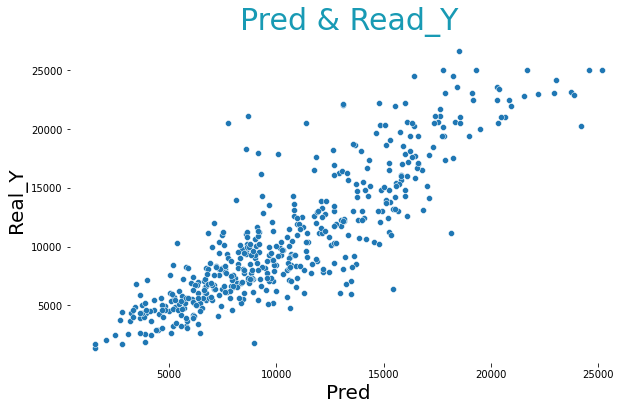

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=pred, y=y_test)
plt.title('Pred & Read_Y', color='#189AB4', fontsize=30)
plt.xlabel('Pred', fontsize=20)
plt.ylabel('Real_Y', fontsize=20)
plt.box(False)
plt.show()

In [ ]:
pd.DataFrame(model.feature_importances_, index = x_train.columns, 
             columns = ['importance']).sort_values(by = 'importance', ascending = False)

,importance
평균기온,627
홈팀,501
월,329
원정팀,328
홈팀순위,299
요일,260
원정팀순위,256
연도,235
날씨,165
